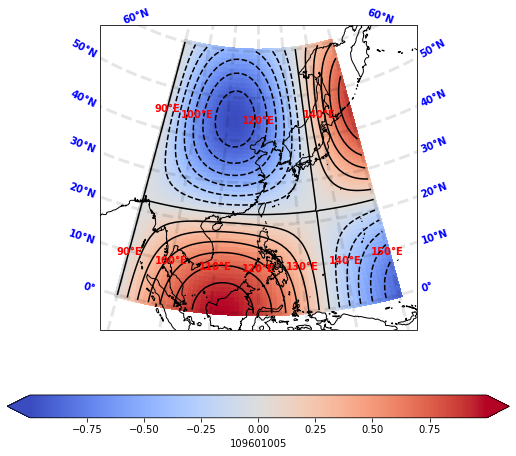

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import numpy as np

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.ticker as mticker
from matplotlib.ticker import MaxNLocator

fig = plt.figure(figsize=(10,8))

#---------
lonl = 90
lonr = 150
latb = 0
latt = 60
ngrids = 25
ngridsx = lonr - lonl #1-deg resolution;
ngridsy = latt - latb #1-deg resolution;
#---------
c_lon = 120
c_lat = 25
para_latt = 30 # 45 
para_latb = 30
#---------
lon = np.linspace(lonl, lonr, ngridsx)
lat = np.linspace(latb, latt, ngridsy)
lon2d, lat2d = np.meshgrid(lon, lat)

data = np.cos(np.deg2rad(lat2d)*4) * np.sin(np.deg2rad(lon2d)*4)

levels = MaxNLocator(nbins = 15).tick_values(data.min(), data.max())
#---------

proj = ccrs.LambertConformal(central_latitude=23.5,
                             central_longitude=120,
                             standard_parallels=(30, 30))
ax = plt.axes(projection=proj) 

cs = ax.pcolormesh(lon, lat, data, cmap='coolwarm', transform=ccrs.PlateCarree())

#---------

#add color_bar
cbar = plt.colorbar(cs, shrink=0.90, orientation='horizontal', label='109601005', extend='both')

#add contour(這邊是等溫線)
ax.contour(lon, lat, data, levels=levels, colors='k', transform=ccrs.PlateCarree())

#add 緯度線
gl = ax.gridlines(crs = ccrs.PlateCarree(), draw_labels=True,
                  linewidth=3, color='k', alpha=0.1, linestyle='--')

#gl.top_labels = False
#gl.bot_labels = True
#gl.left_labels = True
#gl.xlines = True
#gl.ylines = True

#調整經度間隔
gl.xlocator = mticker.FixedLocator(range(lonl, lonr+10, 10)) #longitude intervals(經度標籤) = 10

# gl.xlabels_top = True
# gl.ylabels_left = True
# gl.xlines = True

#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER


#經、緯度標籤style, color
gl.xlabel_style = {'size':15, 'color':'gray'}
gl.xlabel_style = {'color':'red', 'weight':'bold'}
gl.ylabel_style = {'size':15, 'color':'gray'}
gl.ylabel_style = {'color':'blue', 'weight':'bold'}

ax.coastlines('50m')

fig = plt.gcf()
